## Trying to use 'QuTip' to do some theoretical calculations of a superconducting circuit system.

### The Hamiltonian of the Pure Qubit System
The circuit of the qubit can be understand as the following diagram.
![The circuit diagram of a Cooper-pair box or transmon coupled to charges in the environment.](figures/IMG_EA1515FC108D-1.jpeg)

The qubit is coupled to the environment with fluctuating charges represented by a noisy voltage source $V_{env}$ that imposes a dimensionless offset charge $n_g = C_g V_{env} / 2e$ across the junction (note the factor of $2e$, which references the charge of a Cooper pair).

We employ the familiar Cooper-pair-box Hamiltonian with a slight generalization:
$$
\hat{H}_{CPB} = 4 E_C (\hat{n} - n_g + \frac{P - 1}{4})^2 - E_J cos \hat{\varphi} \tag{1}
$$

where 
* $\hat{\varphi}$ is the superconducting phase difference across the junction and 
* $\hat{n}$ is the number of Cooper pairs that have traversed the junction.

The discrete parameter $P = \pm 1$ is the charge parity of the circuit (the parity of the total number of *electrons* that have traversed the junction).
* $P = 1$ for "even" electrons tunneled and 
* $P = -1$ for "odd" electrons tunneled.

For this paper, $\frac{E_J}{E_C} = 17$.

### When Coupling with the Readout Mode
* The strength of the OCS-transmon readout mode coupling will vary with $n_g$.

An OCS transmon coupled to a single linear readout mode is described by the following Hamiltonian:
$$
\hat{H} = \hat{H}_{CPB} + \hbar \omega_r \hat{a}^{\dagger}\hat{a} + \hbar g \hat{n}(\hat{a} + \hat{a}^{\dagger}). \tag{2}
$$

Here,
* $\omega_r$ is the bare readout-mode frequency,
* $g$ is the capacitive coupling rate between the OCS transmon and the readout mode,
* and $\hat{a}$ is the bosonic annihilation operator for excitations in the bare readout mode.

#### Dispersive Shifts
In the dispersive regime, the coupling term $\hbar g \hat{n} (\hat{a} + \hat{a}^{\dagger})$ produces a transmon-state-dependent shift $\chi_{i, p}$ of the readout-mode frequency relative to $\omega_r$.

```
Such dispersive shifts are the basis for qubit readout in cQED.
```

Up to second order in perturbation theory, $\chi_{i, p}$ can be written as follows:
$$
\chi_{i,p} = g^2 \sum_{j \neq i} \frac{2\omega_{ij,p} \left| \langle j,p | \hat{n} | i,p \rangle \right|^2}{\omega_{ij,p}^2 - \omega_r^2}, \tag{3}
$$
which is valid for $g \left| \langle j, p | \hat{n} | i, p \rangle \right| \ll (\omega_{ij, p} - \omega_r)$.

Here,
* $\omega_{ij, p}$ is the transition frequency between transmon states $| i, p \rangle$ and $|j, p \rangle$.

For a harmonic oscillator, only the charge matrix elements $\langle j, p | \hat{n} | i, p \rangle$ coupling nearest-neighbor $i$ and $j$ are nonzero.

In a traditional weakly anharmonic transmon, $\chi_{i, p}$ is well approximated by including only nearest-neighbor terms, ```except in the rare case where a transmon transition is nearly resonant with the readout mode.```

In the more anharmonic OCS regime, charge dispersion of the transmon levels can significantly change the detuning of transition frequencies from the readout mode.  
In addition, ```the charge matrix elements coupling non-nearest neighbor transmon states become important```.

### What am I going to do?
The paper mentioned that it calculate some of the quantities mentioned above by numerical diagonalization in the charge ($\hat{n}$) basis. (Although it doesn't say which quantities they calculated, there are some figure in the paper seems to be theoretical calculated.)

So, I want to understand how they do it!

```What I am going to do is using the numerical method to represent the operators and vectors(states) in the paper!```

After that, I'll try to use these operators and vectors to do some calculation, try if I can figure out how they do the theoretical calculation and draw the figure.

### QuTiP: The Quantum Toolbox in Python

QuTiP, the Quantum Toolbox in Python, is an open-source software for simulating the dynamics of open quantum systems. It is particularly suited for systems that can be described using quantum mechanics, including superconducting circuits, spin systems, cavity QED, and more. 

#### Why Use QuTiP?

Here are several reasons why you should consider using QuTiP for your theoretical calculations of superconducting circuit systems:

1. **Specialized for Quantum Systems**:
    - **Operators and States**: QuTiP provides convenient tools for creating and manipulating quantum operators and states. This includes built-in support for common quantum systems, making it easier to set up the Hamiltonians and operators you need.
    - **Quantum Dynamics**: QuTiP has powerful solvers for the Schrödinger equation, master equation, and other forms of quantum dynamics. This is essential for simulating time evolution and other dynamic properties of quantum systems.

2. **User-Friendly Interface**:
    - **High-Level Abstractions**: QuTiP abstracts many of the low-level details, allowing you to focus on the physics of your problem rather than on implementation details. This makes it easier to translate your theoretical models into simulations.
    - **Rich Ecosystem**: QuTiP has a rich set of built-in functions and utilities for common quantum operations, making it easier to perform complex calculations with minimal code.

3. **Interoperability**:
    - **Numpy Integration**: QuTiP is built on top of Numpy, meaning you can seamlessly integrate Numpy arrays and functions into your QuTiP code. This allows you to leverage the strengths of both libraries.
    - **GPU Acceleration with PyTorch**: While QuTiP itself does not directly support GPU acceleration, it is possible to interface QuTiP with PyTorch for GPU-accelerated calculations. PyTorch, which has a similar API to Numpy, can be used for heavy numerical computations, leveraging GPU capabilities for significant performance improvements.

#### Comparison: QuTiP vs. Numpy

- **Purpose**:
    - **QuTiP**: Designed specifically for quantum mechanics and provides a high-level interface for quantum states, operators, and dynamics.
    - **Numpy**: General-purpose numerical library, excellent for handling large arrays and matrices, but lacks specialized quantum mechanics tools.

- **Ease of Use**:
    - **QuTiP**: Higher-level functions tailored for quantum mechanics reduce the amount of code required to set up and solve problems.
    - **Numpy**: Requires more boilerplate code to set up quantum systems and simulate dynamics, as it does not have built-in quantum mechanics functions.

- **Performance**:
    - **QuTiP**: Optimized for quantum mechanics, but may not utilize GPU acceleration directly.
    - **Numpy**: Highly optimized for CPU operations, can be extended with libraries like CuPy for GPU acceleration.



#### Conclusion

Using QuTiP simplifies the process of simulating and analyzing quantum systems, especially those involving complex Hamiltonians and quantum dynamics. While Numpy is powerful for general numerical computations, QuTiP provides specialized tools that make it easier to implement and explore quantum mechanical models. Moreover, by integrating QuTiP with libraries like PyTorch, you can leverage GPU acceleration to handle more demanding computational tasks efficiently.

### Start Writing the Code

In [1]:
"""
We first import the package we need to use
"""

from qutip import Qobj, basis, num, qzero, destroy
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, hbar, giga
print(f"h: {h}")
print(f"hbar: {hbar}")

h: 6.62607015e-34
hbar: 1.0545718176461565e-34


#### Parameters

From the paper, the parameters used in their experimental setup are:
- $E_J / h = 6.14 \text{ GHz}$
- $E_C / h = 356 \text{ MHz}$
- The readout resonator frequency $\omega_r / 2\pi \approx 9.202 \text{ GHz}$


In [2]:
# Define the parameters value
EJ = 6.14 * giga * h  # in Joules
EC = 0.356 * giga * h  # in Joules
P = -1  # For simplicity, consider P = -1 (odd parity)
omega_r = 9.202 * 2 * np.pi * giga  # Resonator frequency in rad/s
g = 0.01 * giga  # Coupling strength in Hz, adjust as needed
num_levels_to_observe = 5  # Number of energy levels to observe

#### Define Basis
We are going to use $|n \rangle$ to be our basis. The state will be construct from -N to N, totally 2N+1.

(Physically, it should be negative infinity to positive infinity. But since we are doing 'numerical' calculation, we should specific out the range we are calculating.)

In [3]:
# Define the number of states (N+1 states, from 0 to N)
N = 10 # Totally 21 states (include zero state).

# Create basis states |n> for n = -N to N
basis_states = [basis(2*N+1, n + N) for n in range(-N, N+1)]

# # Print the basis states to verify
# for n in range(2 * N + 1):
#     print(f"Basis state |{n}>: {basis_states[n]}")

#### Define Operators
After constructed the basis, we could use the basis to calculate or expand the operator as a matrix!

##### $\hat{n}$ Operator
For simplicity, lets start with the $\hat{n}$.

To calculate the element of the matrix, the method can be:
$$
n_{ij} = \langle i | \hat{n} | j \rangle.
$$

As we could know that $\hat{n} |n \rangle = n | n \rangle$, so the formula become:
$$
n_{ij} = n \langle i | j \rangle = n \cdot \delta_{i, j},
$$

so, the matrix of $\hat{n}$ is then diagonal and can easily be constructed this way in the code.

$$
\hat{n} = \sum_{n=-N}^{N} n | n \rangle \langle n |
$$

In [4]:
# Initialize the \hat{n} operator as a zero matrix of size (2N+1)x(2N+1)
n_operator = qzero(2 * N + 1)

# Construct the n_operator
for n in range(-N, N + 1):
    n_operator += n * basis_states[n + N] * basis_states[n + N].dag()

n_operator # It should be a diagonalized matrix

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.  -9.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  -7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -6.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  -5.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  -4.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  -3.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   

Next, I want to construct the 'cos $ \hat{\varphi}$' operator.

* $\hat{\varphi}$ represent the phase difference of the superconducting wave function across the junction.

The commutator relation of $\hat{n}$ and $\hat{\varphi}$ is:
$$
[\hat{\varphi}, \hat{n}] = i
$$

##### $\hat{\varphi}$ Operator
We can write the operator $\hat{\varphi}$ in terms of $\hat{n}$ with:
$$
\hat{\varphi} = i \frac{\partial}{\partial \hat{n}}.
$$

To confirm this, we just need to put this representation to the commutator and see if it remains true.

After represent the operator $\hat{\varphi}$ in terms of $\hat{n}$, we can use **Central Difference Formula** to approximate the derivative of $f(n)$ (which is also $|n\rangle$) with respect to $n$ with a fraction:
$$
f'(n) \approx \frac{f(n + h) - f(n - h)}{2h}.
$$

In our case, $h = 1$, and thus we can convert it further to
$$
f'(n) \approx \frac{|n + 1 \rangle - | n - 1 \rangle}{2}.
$$

The next step is changing the $f'(n)$ to $\hat{\varphi} |n\rangle$:
$$
\hat{\varphi} | n \rangle = \frac{i}{2} \left(| n + 1 \rangle - | n - 1 \rangle \right)
$$

It looks similar, right?

Yeah, after getting this, we can calculate the element of the matrix $\hat{\varphi}$ under the basis of $| n \rangle$ with formula:
$$
\hat{\varphi}_{m, n} = \langle m | \hat{\varphi} | n \rangle = \frac{i}{2} \cdot \left( \langle m | n + 1 \rangle - \langle m | n - 1 \rangle \right) = \frac{i}{2} \cdot \left(\delta_{m, n + 1} - \delta_{m, n - 1} \right).
$$

There are some common name for this type of matrix:
* superdiagonal
* off-diagonal matrix
* anti-diagonal matrix
which ```the elements are non-zero only on the two diagonals immediately above and below the main diagonal```.

In [5]:
# Initialize the \hat{\varphi} operator as a zero matrix of size (2N+1)x(2N+1)
phi_hat = qzero(2 * N + 1)

# Construct the \hat{\varphi} operator
for m in range(-N, N + 1):
    if m + 1 <= N:
        phi_hat += (1j / 2) * basis_states[m + N] * basis_states[m + 1 + N].dag()
    if m - 1 >= -N:
        phi_hat += (-1j / 2) * basis_states[m + N] * basis_states[m - 1 + N].dag()

# print to verify
# print("Operator matrix for \\hat{\\varphi}:")
phi_hat

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j ]
 [0.-0.5j 0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.-0.5j 0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.-0.5j 0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.-0.5j 0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.+0.j  

##### $e^{\pm i \hat{\varphi}}$ Operators
After constructing the $\hat{\varphi}$ operator, I recognized that we didn't need to use it...

What we need is the $e^{\pm i \hat{\varphi}}$ operator, which can help up construct the $\text{cos} (\hat{\varphi})$ operator easily.

We know that:
$$
e^{\pm i \hat{\varphi}} |n\rangle = |n \pm 1\rangle
$$

So, we can construct the operator with the formula:
1. **Shift Operator $e^{i \hat{\varphi}}$**:
   $$
   e^{i \hat{\varphi}} |n\rangle = |n + 1\rangle 
   $$

   Mathematically, this can be written as:
   $$
   e^{i \hat{\varphi}} = \sum_{n=-N}^{N-1} |n + 1\rangle \langle n|
   $$

2. **Shift Operator $e^{-i \hat{\varphi}}$**:
   $$
   e^{-i \hat{\varphi}} |n\rangle = |n - 1\rangle 
   $$

   Mathematically, this can be written as:
   $$
   e^{-i \hat{\varphi}} = \sum_{n = -N + 1}^{N} |n - 1\rangle \langle n|
   $$

After constructing the shift operators, we can use them to construct the $\text{cos}(\hat{\varphi})$:
$$
\cos(\hat{\varphi}) = \frac{1}{2}(e^{i \hat{\varphi}} + e^{-i \hat{\varphi}})
$$

In [6]:
# Initialize the shift operators as zero matrix of size (2N+1)x(2N+1)
e_iphi = qzero(2 * N + 1)
e_imphi = qzero(2 * N + 1)

# Construct the shift operator e^{i \hat{\varphi}}
for n in range(-N, N): # sum to N - 1 we need range(*, N)
    e_iphi += basis(2 * N + 1, n + 1 + N) * basis(2 * N + 1, n + N).dag()

# Construct the shift operator e^{-i \hat{\varphi}}
for n in range(-N + 1, N + 1): # sum to N we need range(*, N + 1)
    e_imphi += basis(2 * N + 1, n - 1 + N) * basis(2 * N + 1, n + N).dag()

# Construct cos(\hat{\varphi})
cos_phi = 0.5 * (e_iphi + e_imphi)

# Display the result

Shift Operator "+"

In [7]:
e_iphi



Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [8]:
e_imphi


Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:
cos_phi


Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0

##### The Hamiltonian Operator of the CPB
After constructing both the $\hat{n}$ and the $\cos (\hat{\varphi})$ operator, we can use them to construct the Cooper-pair-box Hamiltonian operator now.

Review the formula:
$$
\hat{H}_{CPB} = 4 E_C (\hat{n} - n_g + \frac{P - 1}{4})^2 - E_J cos \hat{\varphi}. \tag{1}
$$

In [10]:
# Constructing the Hamiltonian H_{CPB}
# For different n_g, we will have different H_CPB, so convert it to a function which return different H_CPB

def return_H_CPB(n_g, P) -> Qobj:    
    return (4 * EC * ((n_operator - n_g) + (P - 1)/4)**2 ) - (EJ * cos_phi)

return_H_CPB(0, P)

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.04026651e-22 -2.03420354e-24  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.03420354e-24  8.51556031e-23 -2.03420354e-24  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.03420354e-24  6.81716601e-23 -2.03420354e-24
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

#### Draw FIG 1. First
After we get the Hamiltonian of the Cooper-pair-box, we can use it to calculate the eigenenergies with different $n_g$, to see how the energy of the energy level of the Cooper-Pair-Box will change with the offset charge $n_g$.

In [28]:
# Initialize lists to collect eigenenergies for different P
eigenenergies_list_p_neg1 = []
eigenenergies_list_p_pos1 = []

# Define the range of n_g values
n_g_values = np.linspace(0, 1, 5000)

# Compute eigenenergies for each n_g and P = -1
for n_g in n_g_values:
    H_CPB = return_H_CPB(n_g, -1)
    eigenenergies = H_CPB.eigenenergies()
    eigenenergies_list_p_neg1.append(eigenenergies / EJ)

# Compute eigenenergies for each n_g and P = 1
for n_g in n_g_values:
    H_CPB = return_H_CPB(n_g, 1)
    eigenenergies = H_CPB.eigenenergies()
    eigenenergies_list_p_pos1.append(eigenenergies / EJ)

# Convert the lists to numpy arrays for easier plotting
eigenenergies_array_p_neg1 = np.array(eigenenergies_list_p_neg1)
eigenenergies_array_p_pos1 = np.array(eigenenergies_list_p_pos1)


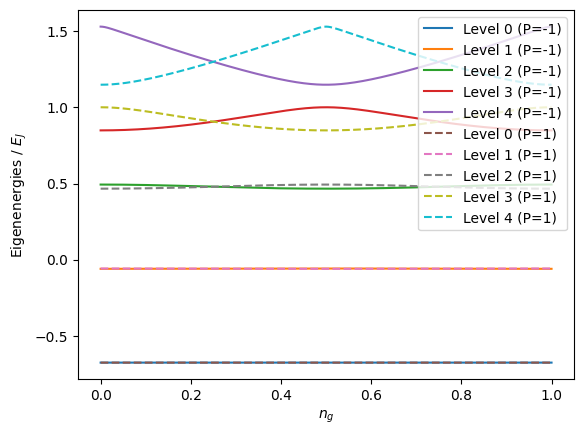

In [29]:
# Plot the eigenenergies as a function of n_g for P = -1 (solid lines)
for i in range(num_levels_to_observe):
    plt.plot(n_g_values, eigenenergies_array_p_neg1[:, i], label=f'Level {i} (P=-1)', linestyle='-')

# Plot the eigenenergies as a function of n_g for P = 1 (dashed lines)
for i in range(num_levels_to_observe):
    plt.plot(n_g_values, eigenenergies_array_p_pos1[:, i], label=f'Level {i} (P=1)', linestyle='--')

plt.xlabel('$n_g$')
plt.ylabel('Eigenenergies / $E_J$')
plt.legend()
plt.show()

#### FIG 2. (a)
FIG 2. (a) shows the plasmon-transition frequencies out of the ground state and the first excited state with odd charge parity.

In [13]:
# Construct a linspace for n_g
n_g_values = np.linspace(0, 0.5, 1000)

# Solve the eigenvalues and eigenstates of H
eigenvalues_for_H = []
eigenstates_for_H = []

for n_g in n_g_values:
    H_CPB = return_H_CPB(n_g, P)
    eigenvals, eigenvects = H_CPB.eigenstates()
    eigenvalues_for_H.append(eigenvals)
    eigenstates_for_H.append(eigenvects)

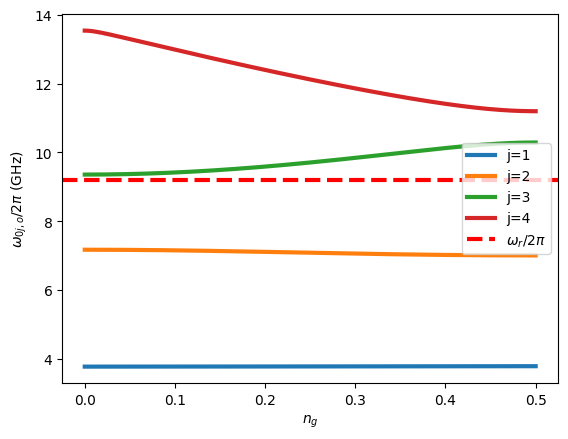

In [14]:
eigenvalues = np.array(eigenvalues_for_H)
# Convert the energy difference between j-th energy level comparing to the ground state into resonant frequency
omega_0j = []
for j in range(1, num_levels_to_observe):
    Delta_E = eigenvalues[:, j] - eigenvalues[:, 0]
    resonant_angular_frequency_of_0j = Delta_E / (h * giga) # Energy to frequency in GHz
    omega_0j.append(resonant_angular_frequency_of_0j)

# Plot the result of different n_g
for j in range(num_levels_to_observe - 1):
    plt.plot(n_g_values, omega_0j[j], linewidth = 3, label=f'j={j+1}')

bare_readout_frequency = omega_r / (2 * np.pi * giga)  # Convert to GHz
plt.axhline(y=bare_readout_frequency, color='r', linestyle='--', linewidth = 3, label=r'$\omega_r / 2\pi$')
plt.xlabel('$n_g$')
plt.ylabel('$\omega_{0j,o} / 2\pi$ (GHz)')
plt.legend()
plt.show()


#### FIG. 2.(b)
We can also compare the state with second excited state.

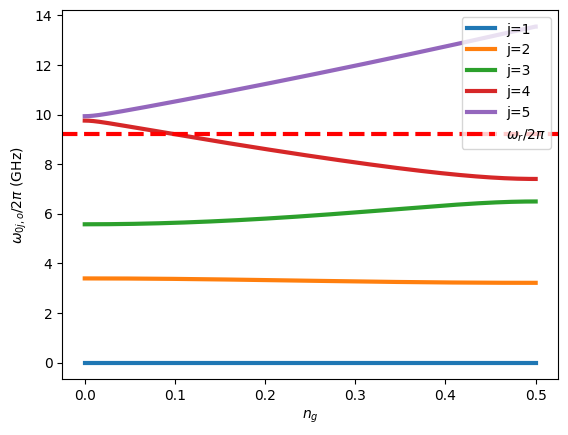

In [24]:
omega_1j = []
for j in range(1, num_levels_to_observe + 1):
    Delta_E = eigenvalues[:, j] - eigenvalues[:, 1]
    resonant_angular_frequency_of_0j = Delta_E / (h * giga) # Energy to frequency in GHz
    omega_1j.append(resonant_angular_frequency_of_0j)

# Plot the result of different n_g
for j in range(num_levels_to_observe):
    plt.plot(n_g_values, omega_1j[j], linewidth = 3, label=f'j={j+1}')

bare_readout_frequency = omega_r / (2 * np.pi * giga)  # Convert to GHz
plt.axhline(y=bare_readout_frequency, color='r', linestyle='--', linewidth = 3, label=r'$\omega_r / 2\pi$')
plt.xlabel('$n_g$')
plt.ylabel('$\omega_{0j,o} / 2\pi$ (GHz)')
plt.legend()
plt.show()


##### Creation and Annihilation Operators
After constructing the $\hat{H}_{CPB}$ operator, the next goal is to construct these two operator. Then, we can use these operators to construct the final Hamiltonian operator for the readout mode and the qubit.

In the number basis ($|n \rangle$), the creation and annihilation operators are well-defined and their matrix forms are straightforward.

1. **Annihilation Operator $\hat{a}$**:
   - The annihilation operator lowers the number state $|n\rangle$ by one quantum, and is defined as:
     $$\hat{a} |n\rangle = \sqrt{n} |n-1\rangle$$
   - The matrix representation of the annihilation operator in the number basis is:
     $$
     \hat{a} = \begin{pmatrix}
     0 & \sqrt{1} & 0 & 0 & \cdots \\
     0 & 0 & \sqrt{2} & 0 & \cdots \\
     0 & 0 & 0 & \sqrt{3} & \cdots \\
     0 & 0 & 0 & 0 & \cdots \\
     \vdots & \vdots & \vdots & \vdots & \ddots
     \end{pmatrix}
    $$

2. **Creation Operator $\hat{a}^\dagger$**:
   - The creation operator raises the number state $|n\rangle$ by one quantum, and is defined as:
     $$\hat{a}^\dagger |n\rangle = \sqrt{n+1} |n+1\rangle$$
   - The matrix representation of the creation operator in the number basis is:
     $$
     \hat{a}^\dagger = \begin{pmatrix}
     0 & 0 & 0 & 0 & \cdots \\
     \sqrt{1} & 0 & 0 & 0 & \cdots \\
     0 & \sqrt{2} & 0 & 0 & \cdots \\
     0 & 0 & \sqrt{3} & 0 & \cdots \\
     \vdots & \vdots & \vdots & \vdots & \ddots
     \end{pmatrix}
    $$

```There is a function in QuTip for us to easily create the destroy operator, and we can use it to construct the creation operator!```

In [16]:
# Construct the annihilation operator \hat{a}
a = destroy(2 * N + 1)

# Construct the creation operator \hat{a}^\dagger
adag = a.dag()

# Display the annihilation operator
# print("Annihilation operator \hat{a}:")
# print(f"Type: {type(a)}")
# a

In [17]:
# # Display the creation operator \hat{a}^\dagger:
# print("Creation operator \hat{a}^\dagger:")
# print(f"Type: {type(adag)}")
adag * a

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  

##### $\hat{H}$ Operator, Finally!


In [25]:
# Construct the Hamiltonian of the readout mode
H_r = hbar * omega_r * adag * a

# Construct the interaction term
H_int = hbar * g * n_operator * (a + adag)

# Construct the total Hamiltonian \hat{H}
H = return_H_CPB(0, P) + H_r + H_int # example

# # Display the operators
# print("H_r: ")
H_r

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.09730975e-24 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.21946195e-23 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

In [26]:
# print("H_int:")
H_int

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.00000000e+00 -1.05457182e-26  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-9.49114636e-27  0.00000000e+00 -1.34225079e-26  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -1.19311181e-26  0.00000000e+00 -1.46125757e-26
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [27]:
# print("Total H:")
H

Quantum object: dims=[[21], [21]], shape=(21, 21), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.04026651e-22 -2.04474925e-24  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.04369468e-24  9.12529129e-23 -2.04762604e-24  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.04613465e-24  8.03662796e-23 -2.04881611e-24
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

#### The Total Hamiltonian of the Qubit Coupling with the Readout Mode (Resonator)
The paper give the formula of the total hamiltonian:
$$
\hat{H} = \hat{H}_{CPB} + \hbar \omega_r \hat{a}^{\dagger}\hat{a} + \hbar g \hat{n}(\hat{a} + \hat{a}^{\dagger}), \tag{2}
$$
and also give a transmon-state-dependent shift $\chi_{i, p}$ of the readout-mode frequency relative to $\omega_r$:
$$
\chi_{i,p} = g^2 \sum_{j \neq i} \frac{2\omega_{ij,p} \left| \langle j,p | \hat{n} | i,p \rangle \right|^2}{\omega_{ij,p}^2 - \omega_r^2}, \tag{3}
$$
but the theory (second order in perturbation theory) of how we can derive this is still too hard for me (I-LI) to understand.

So, I'm going to let the work of this notebook stopping here, until there are some further work I can do with it.

### Conclusion
In this notebook, we try to use QuTip to perform some theoretical calculations of the superconducting qubit. Specifically, the superconducting qubit we are calculating is a Cooper-Pair-Box (CPB) qubit.
We try to understand the meaning of the parameters and quantities in the formula, and show some variables relationship through the 

### Reference
[1] Serniak, K., et al. (2019). "Direct Dispersive Monitoring of Charge Parity in Offset-Charge-Sensitive Transmons." Physical Review Applied 12(1).